In [1]:
%run DFM_class.ipynb
np.random.seed(0)

In [2]:
#generate test data and compare true factor f with rotated true factor F
X,Gamma,F,loading,f=generate_test_data(100,1000,prt=True)


off_diagonal sum= 2.1025552009242183


r2= 0.9913414497191666
r2= 0.9662470753629178
r2= 0.9407987255376573
r2= 0.9832551803412033
r2= 0.9925159242930585


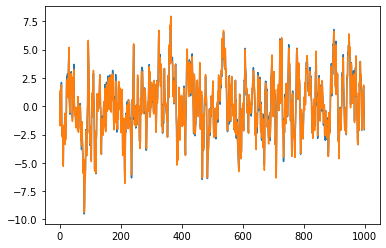

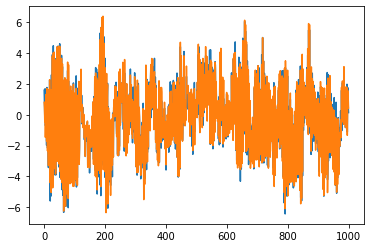

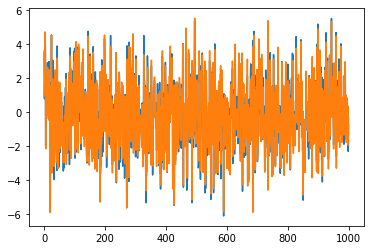

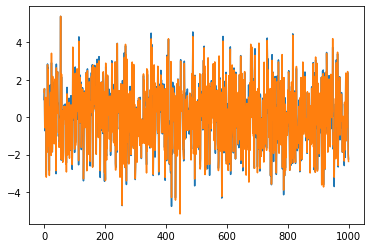

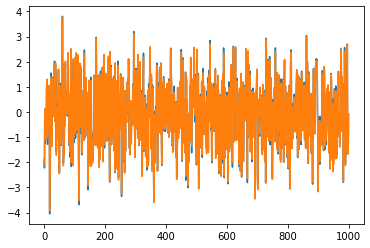

In [3]:
compare_factor_plot(f,F)

r2= 0.9865948348886587
r2= 0.9543869047674407
r2= 0.9512198340215203
r2= 0.9892923179310597
r2= 0.9975087170510558


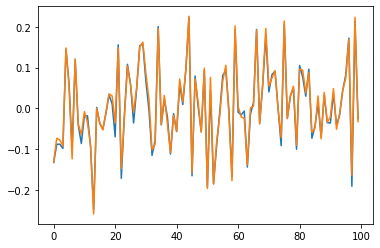

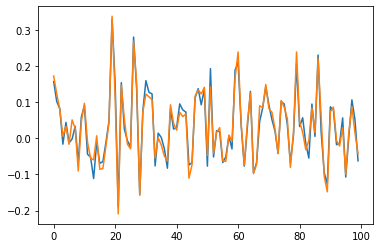

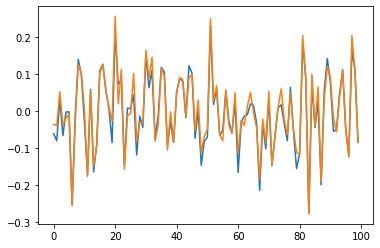

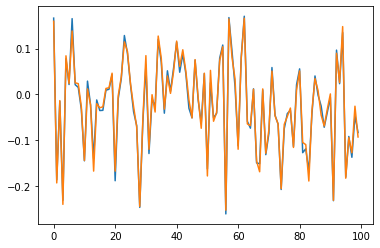

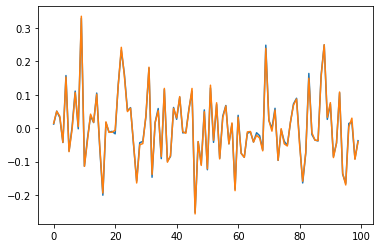

In [4]:
compare_loading_plot(loading,Gamma)

In [95]:
#trace_state compare the space spaned by f and F.
trace_stat(F,f)

0.9999999999999996

In [96]:
from sklearn.metrics import mean_absolute_error

In [116]:
#test for different N
MAE=[]
#specify number of factors
n_factor=5
for n in [10,20,40,80,160]:
    mae=[]
    for i in range(5):
        #generate test data
        X,Gamma,F,loading,f=generate_test_data(n,1000)
        #initialize model
        model=DFM(X,n_factor,5)
        #initialize parameter using pca
        model.pca()
        #map model to stacked form
        model.to_state_space_rep()
        #EM estimation, loglikylihood is returned and saved to ll.
        ll=model.em(max_iter=1000)
        y_true=F[:,model.lag-1:]
        y_pred=model.stacked_factor[:5]
        for i in range(5):
            if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
                y_pred[i]=-y_pred[i]
        mae.append(mean_absolute_error(y_true.T, y_pred.T))
    MAE.append(np.array(mae).mean())

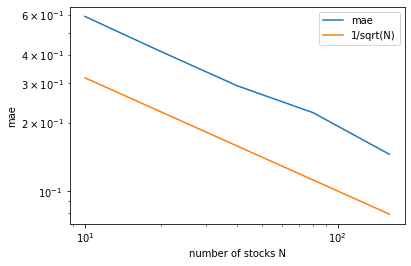

In [126]:
plt.plot([10,20,40,80,160],MAE)
plt.plot([10,20,40,80,160],1/np.sqrt([10,20,40,80,160]))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of stocks N')
plt.ylabel('mae')
plt.legend(['mae', '1/sqrt(N)'])

In [129]:
MAE=[]
for T in [100,200,400,800,1600]:
    print(T)
    mae=[]
    for i in range(5):

        X,Gamma,F,loading,f=generate_test_data(80,T)
        model=DFM(X,5,5)
        model.pca()
        model.to_state_space_rep()
        ll=model.em(max_iter=1000)
        y_true=F[:,model.lag-1:]
        y_pred=model.stacked_factor[:5]
        for i in range(5):
            if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
                y_pred[i]=-y_pred[i]
        mae.append(mean_absolute_error(y_true.T, y_pred.T))
    MAE.append(np.array(mae).mean())

100
200
400
800
1600


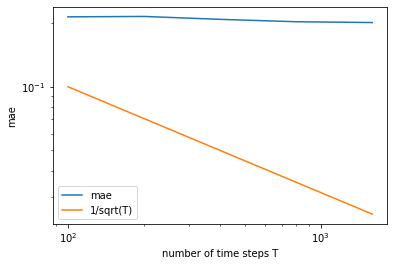

In [133]:
plt.plot([100,200,400,800,1600],MAE)
plt.plot([100,200,400,800,1600],1/np.sqrt([100,200,400,800,1600]))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of time steps T')
plt.ylabel('mae')
plt.legend(['mae', '1/sqrt(T)'])